# US Baby Names 1880-2022

The United States Social Security Administration has a database with the frequency of all baby names from 1880-2022. I am going to analyze this data to find out any interesting pattern in the data. In particular, I want to do the following with the dataset:

-  Visualize the proportion of babies given a particular name over time.
-  Determine the relative rank of a name.
-  Determine the names whose popularity has advanced or declined the most.
-  Determine the most popular names in each year.
-  Analyze trends in names: vowels, consonants, overall diversity, changes in spelling, first and last letters.
-  Analyze external sources of trends: biblical names, celebrities, demographic changes.

The dataset was downloaded from:  http://www.ssa.gov/oact/babynames/limits.html

There were individual files like yob1880.txt for each year. The first step therefore was to load the dataset for each year and put it into a dataframe.

In [21]:
import pandas as pd

years = range(1880, 2023)
    
pieces = []
columns = ['name', 'sex', 'births']

for year in years:
    path = 'baby_names_data/yob%d.txt' % year 
    frame = pd.read_csv(path, names=columns)
        
    frame['year'] = year
    pieces.append(frame)
    
# Concatenate everything into a single DataFrame
names = pd.concat(pieces, ignore_index=True)

In [22]:
names

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
...,...,...,...,...
2085153,Zuberi,M,5,2022
2085154,Zydn,M,5,2022
2085155,Zylon,M,5,2022
2085156,Zymeer,M,5,2022


### Total births by sex and year.

We can aggregate the data at the year and sex level using groupby or pivot_table and then plot it.

In [23]:
total_births = names.pivot_table('births', index='year', columns='sex', aggfunc=sum)
total_births.tail()

sex,F,M
year,,
2018,1698373,1813377
2019,1675139,1790682
2020,1612393,1721588
2021,1635800,1743913
2022,1628730,1733166


<IPython.core.display.Javascript object>


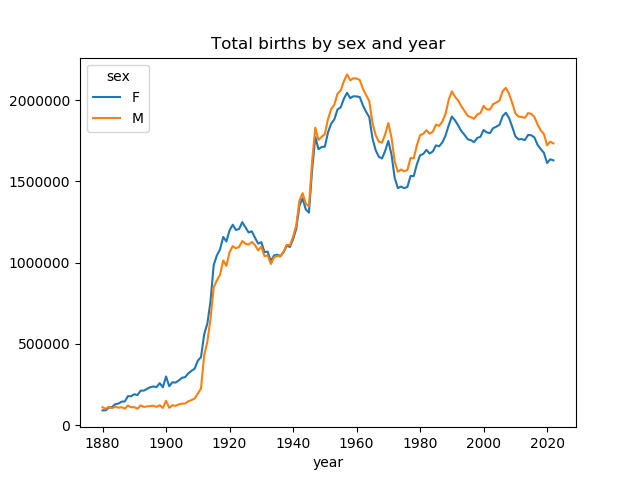

In [24]:
%matplotlib notebook
total_births.plot(title='Total births by sex and year')

There is a very interesting trend here where the number of baby girls were always higher from 1880 to mid 1930s. Beyond that the number of baby boys have always been higher. Why did this shift happen?

### Proportion of baby names.

I will now insert a column prop with a fraction of babies given each name relative to the total number of births.

In [25]:
def add_prop(group):
    group['prop'] = group.births / group.births.sum() 
    return group

names = names.groupby(['year', 'sex']).apply(add_prop)
names.head()

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077642
1,Anna,F,2604,1880,0.028617
2,Emma,F,2003,1880,0.022012
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188


In [26]:
## doing a sanity check to make sure that the sum of all proportions equals 1 as it should.
names.groupby(['year', 'sex']).prop.sum()

year  sex
1880  F      1.0
      M      1.0
1881  F      1.0
      M      1.0
1882  F      1.0
            ... 
2020  M      1.0
2021  F      1.0
      M      1.0
2022  F      1.0
      M      1.0
Name: prop, Length: 286, dtype: float64

Extracting a subset of data: the top 1000 names for each sex/year combination.

In [27]:
pieces = []
for year, group in names.groupby(['year', 'sex']):
    pieces.append(group.sort_values(by='births', ascending=False)[:1000])
    
top1000 = pd.concat(pieces, ignore_index=True)
top1000.head()

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077642
1,Anna,F,2604,1880,0.028617
2,Emma,F,2003,1880,0.022012
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188


In [28]:
sorted_top1000 = top1000.sort_values(by=['year', 'prop'], ascending=[True, False])
most_popular_names_df = sorted_top1000.groupby('year').first().reset_index()
most_popular_names_df

,year,name,sex,births,prop
0,1880,John,M,9655,0.087383
1,1881,John,M,8769,0.087048
2,1882,John,M,9557,0.084065
3,1883,John,M,8894,0.085008
4,1884,John,M,9388,0.082033
...,...,...,...,...,...
138,2018,Emma,F,18801,0.011070
139,2019,Liam,M,20601,0.011505
140,2020,Liam,M,19828,0.011517
141,2021,Liam,M,20365,0.011678


<IPython.core.display.Javascript object>


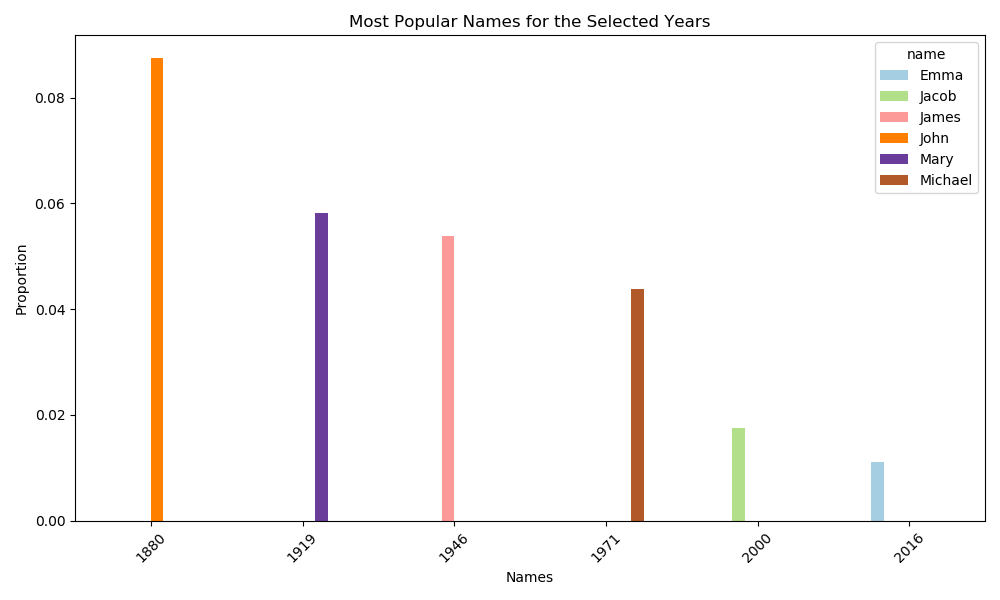

In [29]:
import matplotlib.pyplot as plt

selected_years = most_popular_names_df[most_popular_names_df['year'].isin([1880, 1919, 1946, 1971, 2000, 2016])]

pivot_table = selected_years.pivot(index='year', columns='name', values='prop')

ax = pivot_table.plot(kind='bar', colormap='Paired', figsize=(10, 6))
plt.title("Most Popular Names for the Selected Years")
plt.xlabel("Names")
plt.ylabel("Proportion")
plt.xticks(rotation=45)
ax.set_xticklabels(pivot_table.index)
ax.set_xlabel("Names")
ax.set_ylabel("Proportion")
plt.tight_layout()


### Analyzing Naming Trends

In [30]:
## Splitting the top 1000 names into boy and girl first.
boys = top1000[top1000.sex == 'M']
girls = top1000[top1000.sex == 'F']

In [31]:
## Making a pivot table of the total number of births by year and name.
total_births = top1000.pivot_table('births', index='year',
                                  columns='name', aggfunc=sum)
total_births.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 143 entries, 1880 to 2022
Columns: 7322 entries, Aaden to Zyon
dtypes: float64(7322)
memory usage: 8.0 MB


<IPython.core.display.Javascript object>


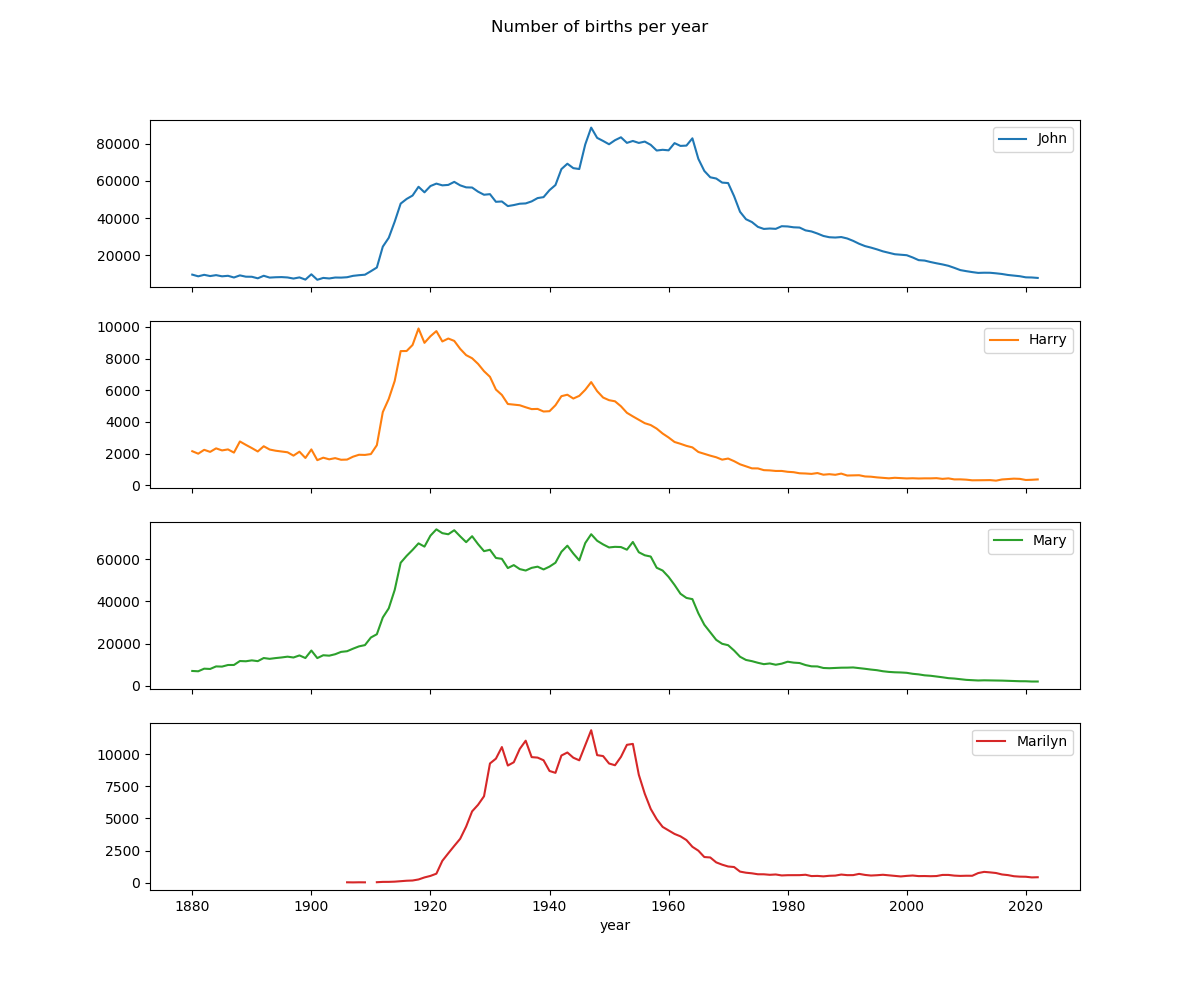

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fbaa89e9e10>,
      dtype=object)

In [32]:
## plotting a subset of data. The number of John, Harry, Mary and Marilyn names for each year.
subset = total_births[['John', 'Harry', 'Mary', 'Marilyn']]
subset.plot(subplots=True, figsize=(12, 10), grid=False, title="Number of births per year")

#### By looking at the above plot you might conclude that these names have grown out of favor, but the story is a bit more complicated as will be explored now.

### Measuring the increase in naming diversity.

One explanation for the decrease is that fewer parents are choosing common names for their children. This hypothesis can be explored and confirmed by the data. One measure is the proportion of births represented by the top1000 popular names, aggregated by year and sex.

<IPython.core.display.Javascript object>


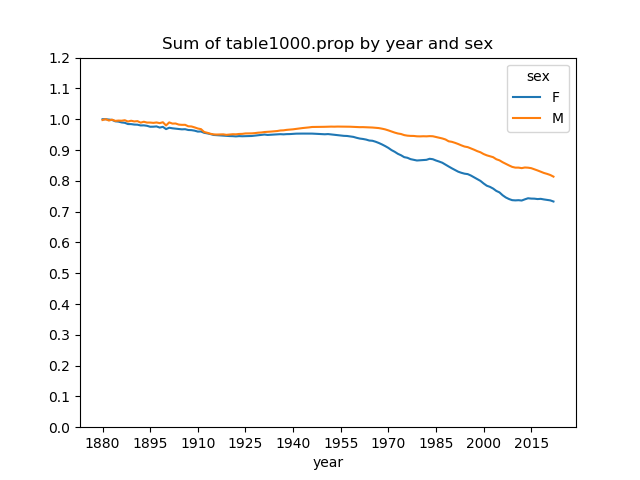

In [33]:
import numpy as np
table = top1000.pivot_table('prop', index='year', columns='sex', aggfunc=sum)

table.plot(title='Sum of table1000.prop by year and sex', 
           yticks=np.linspace(0, 1.2, 13), xticks=range(1880, 2030, 15))

### Number of names to get to 50% of births.
There is decreasing total proportion in the top 1000 implying increasing name diversity. Another interesting metric is the number of distinct names, taken in order of popularity from highest to lowest in the top 50% of births.

In [34]:
df = boys[boys.year == 2010]
df

,name,sex,births,year,prop
260876,Jacob,M,22144,2010,0.011547
260877,Ethan,M,18011,2010,0.009392
260878,Michael,M,17374,2010,0.009059
260879,Jayden,M,17192,2010,0.008964
260880,William,M,17064,2010,0.008898
...,...,...,...,...,...
261871,Bailey,M,196,2010,0.000102
261872,Destin,M,196,2010,0.000102
261873,Eliezer,M,196,2010,0.000102
261874,Enoch,M,196,2010,0.000102


After sorting prop in descending order, we want to know how many of the most popular names it takes to reach 50%.

In [35]:
prop_cumsum = df.sort_values(by='prop', ascending=False).prop.cumsum()
prop_cumsum.values.searchsorted(0.5)

116

In [36]:
## in 1990 this number was much smaller.
df = boys[boys.year == 1900]
in1900 = df.sort_values(by='prop', ascending=False).prop.cumsum()
in1900.values.searchsorted(0.5) + 1

25

In [37]:
## Now we can do this operation for each year and show it in a plot.
def get_quantile_count(group, q=0.5):
    group = group.sort_values(by='prop', ascending=False) 
    return group.prop.cumsum().values.searchsorted(q) + 1
    
diversity = top1000.groupby(['year', 'sex']).apply(get_quantile_count)
diversity = diversity.unstack('sex')
diversity.head()

sex,F,M
year,,
1880,38,14
1881,38,14
1882,38,15
1883,39,15
1884,39,16


<IPython.core.display.Javascript object>


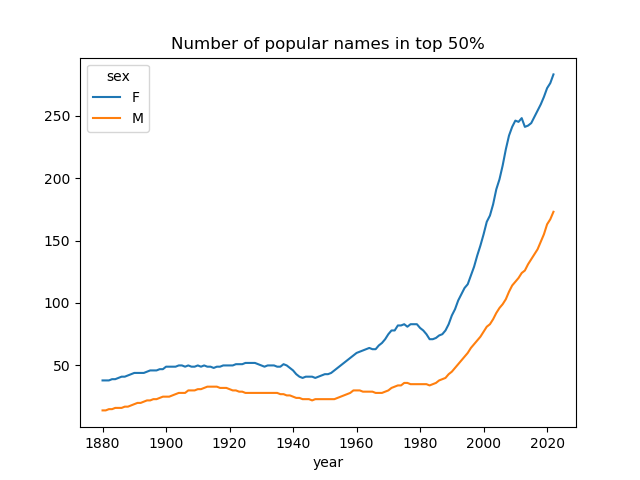

In [38]:
diversity.plot(title="Number of popular names in top 50%")

#### Girl names have always been more diverse than boy names, and they have become increasingly more so over time. Also, the number of names it takes to get to 50% has increased dramatically implying that people are naming their kids more diverse names.

### The last letter revolution.

In 2007, baby name researcher Laura Wattenberg pointed out on her website that the distribution of boy names by final letter has changed significantly over the last 100 years.

In [39]:
# extract last letter from name column
get_last_letter = lambda x: x[-1] 
last_letters = names.name.map(get_last_letter) 
last_letters.name = 'last_letter'
    
table = names.pivot_table('births', index=last_letters,
                              columns=['sex', 'year'], aggfunc=sum)

In [40]:
subtable = table.reindex(columns=[1910, 1960, 2010], level='year')
subtable.head()

sex                 F                            M                    
year             1910      1960      2010     1910      1960      2010
last_letter                                                           
a            108399.0  691323.0  677323.0    977.0    5217.0   28896.0
b                 NaN     694.0     455.0    411.0    3911.0   39304.0
c                 5.0      49.0     958.0    482.0   15458.0   23364.0
d              6751.0    3731.0    2645.0  22112.0  262131.0   44864.0
e            133599.0  435008.0  317005.0  28665.0  178762.0  130348.0

In [41]:
subtable.sum()

sex  year
F    1910     396503.0
     1960    2022061.0
     2010    1776636.0
M    1910     194209.0
     1960    2132230.0
     2010    1917792.0
dtype: float64

In [42]:
letter_prop = subtable / subtable.sum()
letter_prop

sex                 F                             M                    
year             1910      1960      2010      1910      1960      2010
last_letter                                                            
a            0.273388  0.341890  0.381239  0.005031  0.002447  0.015067
b                 NaN  0.000343  0.000256  0.002116  0.001834  0.020494
c            0.000013  0.000024  0.000539  0.002482  0.007250  0.012183
d            0.017026  0.001845  0.001489  0.113857  0.122937  0.023394
e            0.336943  0.215131  0.178430  0.147599  0.083838  0.067968
f                 NaN  0.000010  0.000055  0.000783  0.004329  0.001206
g            0.000144  0.000156  0.000377  0.002260  0.009488  0.001406
h            0.051531  0.036220  0.076011  0.045564  0.037914  0.051828
i            0.001526  0.039965  0.031700  0.000844  0.000610  0.022672
j                 NaN       NaN  0.000093       NaN       NaN  0.000772
k            0.000121  0.000155  0.000356  0.036579  0.049374  0.018531
l            0.043188  0.033871  0.026391  0.065023  0.104888  0.070455
m            0.001200  0.008611  0.002599  0.058046  0.033832  0.024707
n            0.079238  0.130680  0.140044  0.143387  0.152510  0.362404
o            0.001672  0.002440  0.001247  0.017064  0.012840  0.042558
p            0.000018  0.000023  0.000020  0.003172  0.005674  0.001268
q                 NaN       NaN  0.000030       NaN       NaN  0.000180
r            0.013395  0.006765  0.018045  0.064472  0.031050  0.087390
s            0.039036  0.012762  0.013336  0.130797  0.102699  0.065160
t            0.027432  0.015197  0.007838  0.072885  0.065643  0.022861
u            0.000683  0.000574  0.000416  0.000124  0.000057  0.001227
v                 NaN  0.000060  0.000117  0.000113  0.000036  0.001451
w            0.000020  0.000031  0.001190  0.006323  0.007706  0.016183
x            0.000015  0.000037  0.000730  0.003965  0.001851  0.008599
y            0.110975  0.152551  0.116753  0.077345  0.161011  0.058207
z            0.002436  0.000658  0.000700  0.000170  0.000184  0.001829

<IPython.core.display.Javascript object>


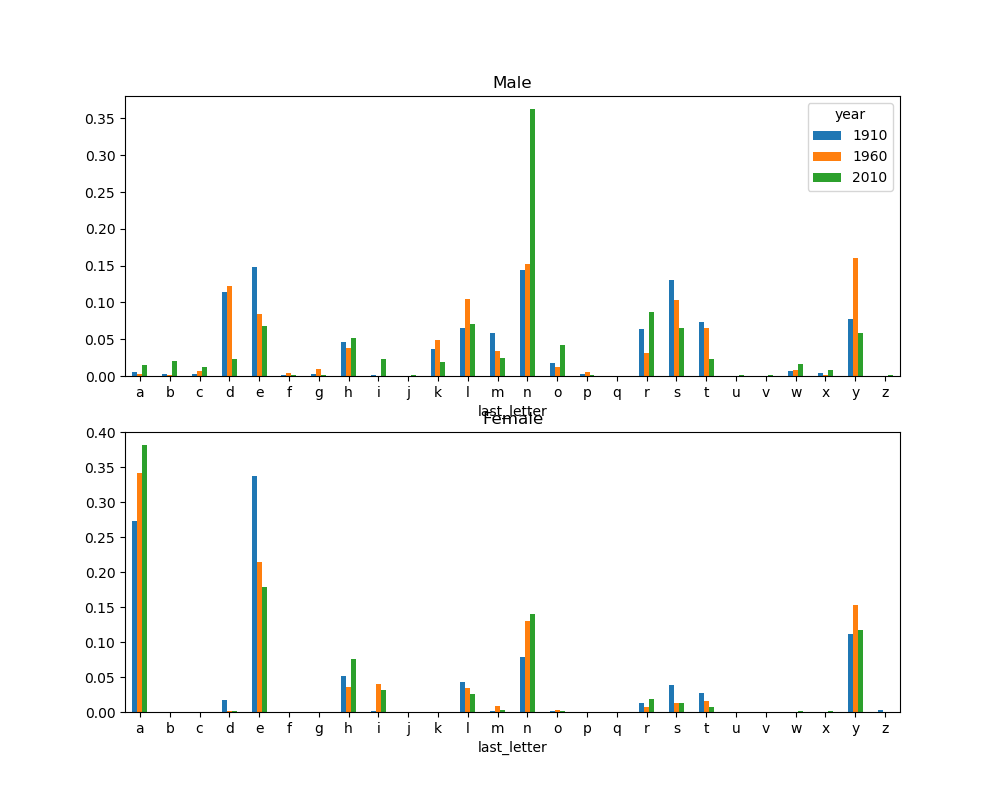

In [43]:
## With the letter proportion now in hand, I can make a bar plot for each sex broken down by year.
import matplotlib.pyplot as plt
    
fig, axes = plt.subplots(2, 1, figsize=(10, 8))
letter_prop['M'].plot(kind='bar', rot=0, ax=axes[0], title='Male')
letter_prop['F'].plot(kind='bar', rot=0, ax=axes[1], title='Female', legend=False)

#### Boy names ending in n have experienced significant growth since the 1960s.

### Letter proportional of boy names.

In [44]:
letter_prop = table / table.sum()
dny_ts = letter_prop.loc[['d', 'n', 'y'], 'M'].T
dny_ts.head()

last_letter,d,n,y
year,,,
1880,0.083057,0.153217,0.075763
1881,0.083246,0.153221,0.077459
1882,0.085332,0.149561,0.077538
1883,0.084053,0.151656,0.079149
1884,0.086122,0.149927,0.080408


<IPython.core.display.Javascript object>


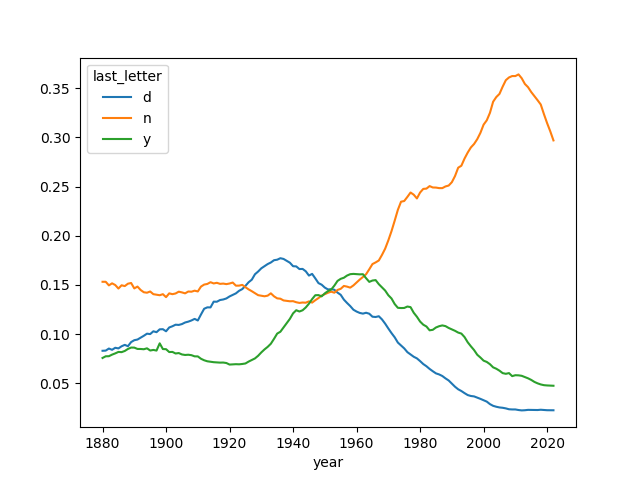

In [46]:
dny_ts.plot()

### Boy names that became girl names.

One such example is Lesley or Leslie.

In [47]:
## Get the count of all "Leslie" like names.
all_names = pd.Series(top1000.name.unique())
lesley_like = all_names[all_names.str.lower().str.contains('lesl')]
lesley_like

632     Leslie
2293    Lesley
4263    Leslee
4730     Lesli
6105     Lesly
dtype: object

In [48]:
filtered = top1000[top1000.name.isin(lesley_like)]
filtered.groupby('name').births.sum()

name
Leslee       993
Lesley     35039
Lesli        929
Leslie    380170
Lesly      11434
Name: births, dtype: int64

In [49]:
## Aggregate by sex and year and normalize withing year.
table = filtered.pivot_table('births', index='year', columns='sex', aggfunc='sum')
table = table.div(table.sum(1), axis=0)
table.tail()

sex,F,M
year,,
2018,1.0,NaN
2019,1.0,NaN
2020,1.0,NaN
2021,1.0,NaN
2022,1.0,NaN


<IPython.core.display.Javascript object>


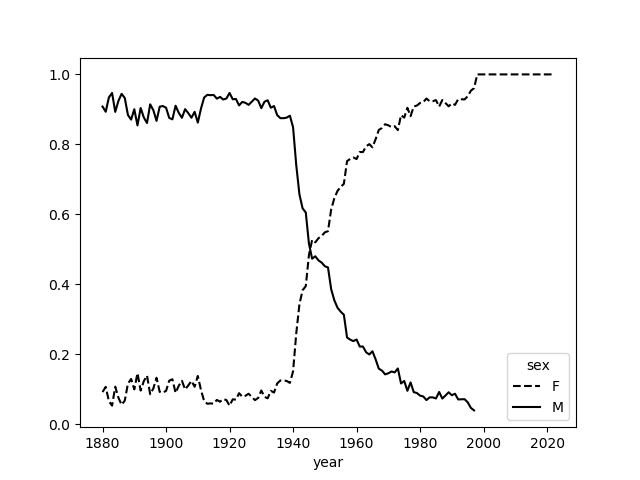

In [50]:
## Now plotting a breakdown by sex over time.
table.plot(style={'M': 'k-', 'F': 'k--'})

#### As you can see, Leslie started becoming a predominantly Female name in the 1940s.